# EnKF Experiments

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys
import os

%matplotlib inline

In [2]:
sys.path.append('../../../../stationsim/')

In [3]:
from ensemble_kalman_filter import EnsembleKalmanFilter, AgentIncluder
from stationsim_gcs_model import Model

In [4]:
sys.path.append('../')

In [5]:
from experiment_utils import Modeller, Processor

## Functions

In [6]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [7]:
data_dir = '../results/data/exp1/'
fig_dir = '../results/figures/exp1/'
model_dir = '../results/models/exp1/'

In [8]:
toy_model_baseline_dir = data_dir + 'toy_model_baseline/'
toy_model_1_dir = data_dir + 'toy_model_exp_1/'

## Toy model

### Experiment 1

In [9]:
pop_size = 20

In [10]:
model_path = model_dir + f'p{pop_size}/'
data_path = data_dir + f'p{pop_size}/'
fig_path = fig_dir + f'p{pop_size}/'

In [11]:
for p in [model_path, data_path, fig_path]:
    if not os.path.isdir(p):
        os.makedirs(p)

#### Run experiment

In [12]:
Modeller.run_experiment_1(pop_size=pop_size, inclusion=AgentIncluder.BASE, model_path=model_path)

  0%|          | 0/10 [00:00<?, ?it/s]../../../../stationsim/ensemble_kalman_filter.py:170: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)
/home/keiran/miniconda3/envs/dust/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/keiran/miniconda3/envs/dust/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 10%|█         | 1/10 [01:06<09:56, 66.32s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 2/10 [01:51<07:12, 54.11s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 3/10 [03:24<08:22, 71.77s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 4/10 [04:18<06:27, 64.60s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 5/10 [05:01<04:43, 56.76s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 6/10 [05:44<03:28, 52.14s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 7/10 [06:31<02:31, 50.39s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 8/10 [07:28<01:45, 52.64s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 9/10 [08:14<00:50, 50.45s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


100%|██████████| 10/10 [09:10<00:00, 55.02s/it]


In [13]:
Processor.process_experiment_1(model_path=model_path, data_path=data_path)

#### Read data

In [37]:
results = pd.read_csv(data_path + 'metrics.csv')
results.head()

,time,forecast,obs,analysis,baseline
0,0,NaN,NaN,NaN,NaN
1,20,0.468839,1.048366,0.392200,0.657867
2,40,2.720890,0.347771,0.140507,2.746288
3,60,0.093589,1.544641,0.392082,2.235211
4,80,2.154277,1.605412,0.347540,2.968400


In [38]:
results.shape

(976, 5)

#### Tidy up data

In [39]:
error_types = ['forecast', 'obs', 'analysis', 'baseline']

In [40]:
tidy_df = tidy_dataframe(results, 'time', error_types)
tidy_df.head()

,time,variable,value
0,0.0,forecast,NaN
1,0.0,obs,NaN
2,0.0,analysis,NaN
3,0.0,baseline,NaN
4,20.0,forecast,0.468839


#### Plot results

In [41]:
estimator = np.median

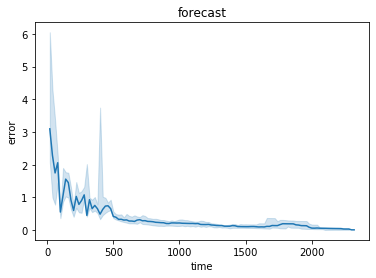

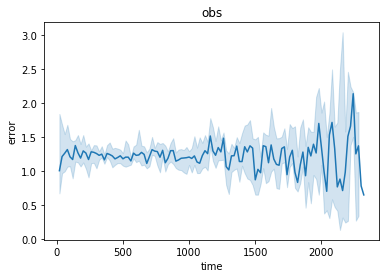

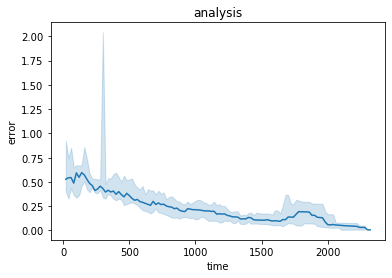

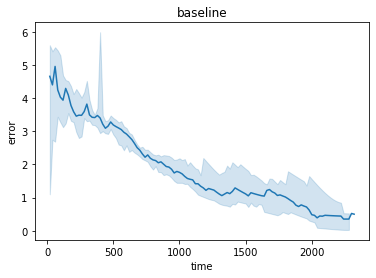

In [42]:
for error_type in error_types:
    df = tidy_df.loc[tidy_df['variable']==error_type, :]
    plt.figure()
    sns.lineplot(x='time', y='value', data=df, estimator=estimator)
    plt.ylabel('error')
    plt.title(error_type)
    plt.savefig(fig_path + f'{error_type}.pdf')
    plt.show()

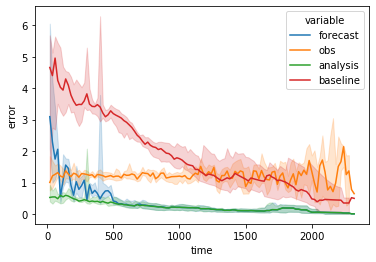

In [43]:
plt.figure()
sns.lineplot(x='time', y='value', hue='variable', data=tidy_df, estimator=estimator)
plt.ylabel('error')
plt.savefig(fig_path + 'all.pdf')
plt.show()

Comparing analysis with baseline:

In [44]:
reduced_tidy_df = tidy_df.loc[(tidy_df['variable']=='baseline') | (tidy_df['variable']=='analysis'), :]

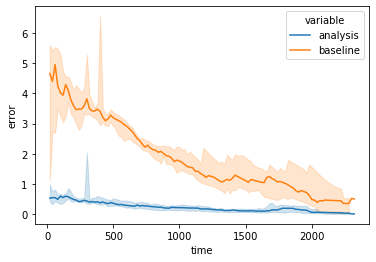

In [45]:
plt.figure()
sns.lineplot(x='time', y='value', hue='variable', data=reduced_tidy_df, estimator=estimator)
plt.ylabel('error')
plt.savefig(fig_path + 'all_reduced_baseline.pdf')
plt.show()

Comparing analysis with forecast:

In [46]:
reduced_tidy_df = tidy_df.loc[(tidy_df['variable']=='forecast') | (tidy_df['variable']=='analysis'), :]

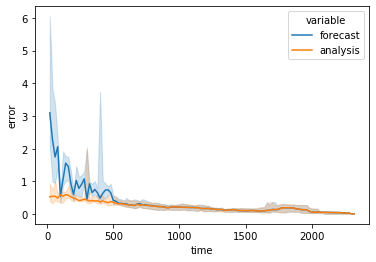

In [47]:
plt.figure()
sns.lineplot(x='time', y='value', hue='variable', data=reduced_tidy_df, estimator=estimator)
plt.ylabel('error')
plt.savefig(fig_path + 'all_reduced_forecast.pdf')
plt.show()